In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [340]:
df = pd.read_csv('./Desktop/iris/iris.csv')

In [341]:
df.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
variety        0
dtype: int64

In [342]:
df.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'variety'], dtype='object')

In [343]:
df.head(3)

,sepallength,sepalwidth,petallength,petalwidth,variety
0,5.1,3.5,1.4,0.2,"""Setosa"""
1,4.9,3.0,1.4,0.2,"""Setosa"""
2,4.7,3.2,1.3,0.2,"""Setosa"""


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
variety        150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


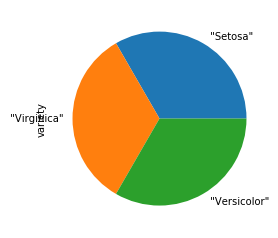

In [344]:
df.variety.value_counts().plot(kind='pie')

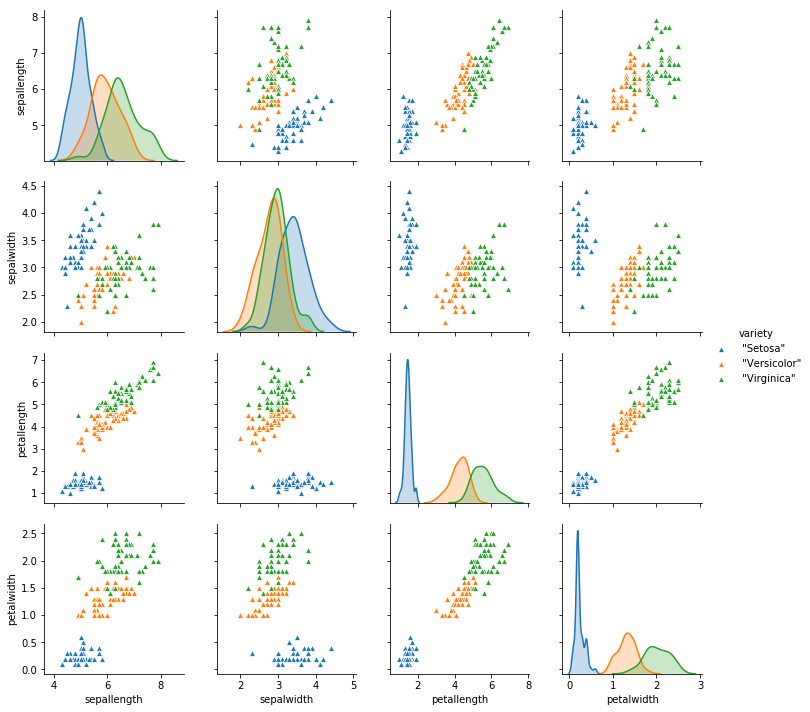

In [369]:
sns.pairplot(data=df[df.columns], hue='variety', markers='^')
plt.show()

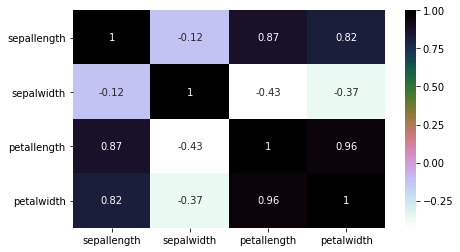

In [370]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [371]:
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier #for random forest classifier
from sklearn import metrics #for checking the model accuracy
import warnings
warnings.filterwarnings("ignore")

In [372]:
train, test = train_test_split(df, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [373]:
train_X = train[['sepallength','sepalwidth','petallength','petalwidth']]# taking the training data features
train_y=train.variety# output of our training data
test_X= test[['sepallength','sepalwidth','petallength','petalwidth']] # taking test data features
test_y =test.variety   #output value of test data

In [374]:
train_X.head(2)

,sepallength,sepalwidth,petallength,petalwidth
11,4.8,3.4,1.6,0.2
23,5.1,3.3,1.7,0.5


In [375]:
test_X.head(2)

,sepallength,sepalwidth,petallength,petalwidth
129,7.2,3.0,5.8,1.6
145,6.7,3.0,5.2,2.3


KNN

In [376]:
svm = svm.SVC()
svm.fit(train_X,train_y)
prediction=svm.predict(test_X) 
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

The accuracy of the SVM is: 0.9777777777777777


In [378]:
reg = LogisticRegression()
reg.fit(train_X,train_y)
prediction=reg.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


In [379]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9333333333333333


In [380]:
model=KNeighborsClassifier(n_neighbors=2) 
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


In [381]:
random=RandomForestClassifier(max_depth=3)
random.fit(train_X,train_y)
prediction=random.predict(test_X)
print(metrics.accuracy_score(prediction,test_y))

0.9333333333333333


In [385]:
models=[LogisticRegression(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
model_names=['LogisticRegression','SVM','RandomForest','KNearestNeighbors']

acc=[]
d={}

for model in range(len(models)):
    muni=models[model]
    muni.fit(train_X,train_y)
    pred=muni.predict(test_X)
    acc.append(accuracy_score(pred,test_y))
     
d={'Modelling Algo':model_names,'Accuracy':acc}

In [386]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.955556
1,SVM,0.977778
2,RandomForest,0.933333
3,KNearestNeighbors,0.977778


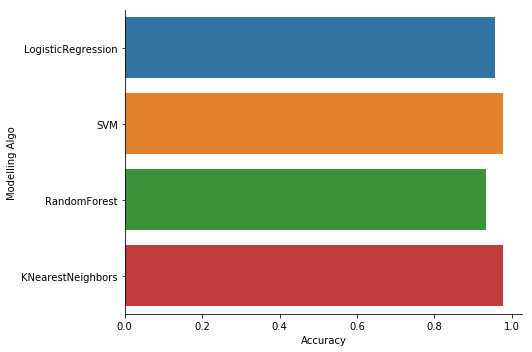

In [387]:
sns.factorplot(data=acc_frame,y='Modelling Algo',x='Accuracy',kind='bar',size=5,aspect=1.5)